 <u><font size="7"> **Muestreo (*sampling*) y reconstrucción** 
    
 <u><font size="7"> **de señales:**

<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide*

### Si tenemos una señal analógica (continua temporalmente) que pasa por un proceso de muestreo, podemos ser capaces reconstruir la señal a partir de sus muestras sin pérdida de información  (o con la cantidad mínima posible).

### En este notebook se pretende ejemplificar la reconstrucción de dos señales sinusoidales usando la condición de Nyquist-Shannon en el teorema de muestro (*sampling theorem*).

Advertencia: En este notebook pueden encontrarse con términos en inglés o *espanglish* para la asignación de variables o la descripción de una cantidad. El autor (su servidor) pide una disculpa, pues fue víctima de la cultura anglosajona.

# ¿En qué consiste el muestreo de una señal analógica?:

### Aunque algunas otras maneras de muestrear una señal analógica, limitaremos este notebook al método conocido como *muestreo periódico* o *uniforme (periodic sampling* o *uniform sampling)* .

### El muestreo periódico está descrito mediante la relación:

<font size="5"> $x(n)=x_a (t)=x_a (n \tau)$, **con** $- \infty < n < \infty$

### en donde $x(n)$ es la señal de tiempo discretizado de tomar las muestras de la señal analógica $x_a (t)$ cada $\tau$ unidades de tiempo (que en este caso serán segundos). $\tau$ hace referencia a la frecuencia de muestreo, es el intervalo de tiempo entre muestras sucesivas, llamado *periodo* o *intervalo de muestreo*.

### Definimos la tasa de muestras (número de muestras por segundo) o también llamada frecuencia de muestreo, como:

<font size="5"> $F_s := {1}/{\tau}$ $[\frac{1}{s}=Hz]$

### El muestreo periódico establece una relación lineal entre la variable continua tiempo de la señal análoga y la variable $n$ correspondiente a su discretización, dada por:

<font size="5"> $t=n \tau =\frac{n}{F_s}$

# Relación entre frecuencias de una señal analógica y su señal de tiempo discreto asociada:

### Denotadas por $F$ y $f$ respectivamente, o equivalentemente en términos angulares, $\Omega$ y $\omega$ respectivamente, vamos a  establecer la relación entre ellas considerando una señal analógica definida como:

<font size="5"> $x_a (t)=Acos(2 \pi Ft+\phi)$, <font size="3"> **con tasa de muestreo** <font size="5"> $F_s=\frac{1}{\tau}$

### Entonces vamos a tener que, de acuerdo a lo anterior:

<font size="5"> $t=n\tau \Rightarrow x_a (t):= x(n)=Acos(2 \pi Fn \tau +\phi)=Acos(\frac{2 \pi Fn}{F_s}+\phi)$

### Recordando que la señal de tiempo discreto está expresada como:

<font size="5"> $x(n)=Acos(2 \omega n +\phi)=Acos(2 \pi fn \tau +\phi)$ <font size="3"> **, en donde $f$ corresponde a la frecuencia de oscilación por muestra.**
   

### Podemos comparar las dos expresiones para $x(n)$ para ver que $F$ y $f$ están linealmente relacionadas mediante:

<font size="5"> $f=\frac{F}{F_s}$ o $\omega = \Omega \tau$

### En donde $-\infty < F, \Omega < \infty$ y $f$ es la frecuencia normalizada $\frac{-1}{2}<f<\frac{1}{2}$ o $- \pi < \omega < \pi$.

### Entonces tenemos que:

<font size="5"> $f_{max}=\frac{1}{2} Hz$, $\omega _{max}=\pi$, $F_{max}=\frac{F_s}{2}=\frac{1}{2\tau}$, $\Omega_{max}=\pi F_s = \frac{\pi}{\tau}$ 

# Después de las bases anteriores, procederemos a enunciar el teorema de muestreo y la condición de Nyquist-Shannon para la reconstrucción de señales:

### Una señal analógica $x_a (t)$ que no tiene componentes de  frecuencia mayores a $F_{max}$, puede ser muestreada y construida de nuevo sin pérdida de información si se cumple que $F_s\geq 2F_{max}$.

### A $2F_{max}= F_N$ se le conoce como la *Nyquist Rate*.

#### Nota: Dependiendo la literatura consultada, la condición se puede tomar como un mayor estricto $F_s> 2F_{max}$.

### Retomando lo anterior, si la señal es muestreada a una tasa mayor o igual a $F_N$, $x_a(t)$ puede ser exactamente reconstruida  desde sus *sample values* usando la función de interpolación:

<font size="5"> $g(t)=\frac{sen(2 \pi F_N t)}{2\pi F_N t}$

### Por lo que $x_a (t)$ se expresa como:

<font size="5"> $x_a (t)=\sum _{- \infty} ^{\infty} x_a(\frac{n}{F_s}) \cdot g(t-\frac{n}{F_s})$

# En el primer ejercicio de este notebook vamos a ejemplificar la reconstrucción de la señal:

<font size="5"> $x_a (t) = sen(2 \pi F t)$ <font size="3"> (de una unidad de amplitud y fase nula).
    
<font size="3"> Definimos la frecuencia <font size="5"> $F$ <font size="3"> de la señal analógica <font size="5"> $x_a(t)$ <font size="3"> como  <font size="5"> $F=20Hz$
    
    

### Vamos a ejemplificar una reconstrucción en tres casos, cuando en el proceso de muestreo periódico se tenga una tasa de muestreo asociada (*sampling rate*) de:

<font size="5"> 1) $F_s=35Hz$

<font size="5"> 2) $F_s=50Hz$

<font size="5"> 3) $F_s=100Hz$

# $\blacksquare$ Caso 1, $F_s=35Hz$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
F=20 #Hz
t=np.linspace(0,0.5,200)
x_a=np.sin(2*np.pi*F*t)
x_a

array([ 0.00000000e+00,  3.10518032e-01,  5.90336692e-01,  8.11791702e-01,
        9.52988909e-01,  9.99968847e-01,  9.48086844e-01,  8.02472214e-01,
        5.77521152e-01,  2.95473450e-01, -1.57862420e-02, -3.25485227e-01,
       -6.03005107e-01, -8.20908875e-01, -9.57653470e-01, -9.99719634e-01,
       -9.42948495e-01, -7.92952733e-01, -5.64561683e-01, -2.80355229e-01,
        3.15685498e-02,  3.40371303e-01,  6.15523241e-01,  8.29821460e-01,
        9.62079363e-01,  9.99221269e-01,  9.37575144e-01,  7.83235632e-01,
        5.51461512e-01,  2.65167138e-01, -4.73429900e-02, -3.55172553e-01,
       -6.27887973e-01, -8.38527236e-01, -9.66265486e-01, -9.98473878e-01,
       -9.31968129e-01, -7.73323331e-01, -5.38223906e-01, -2.49912962e-01,
        6.31056313e-02,  3.69885285e-01,  6.40096223e-01,  8.47024034e-01,
        9.70210796e-01,  9.97477646e-01,  9.26128849e-01,  7.63218303e-01,
        5.24852163e-01,  2.34596503e-01, -7.88525454e-02, -3.84505835e-01,
       -6.52144947e-01, -

### En este proceso de sampling vamos a tener una señal temporal discreta expresada como $x(n)=sin(2\pi Fn\tau)$, con <font size="5">$\tau =\frac{1}{F_s}=\frac{1}{35Hz}$ y $n=\frac{t}{\tau}=F_s t$, **por lo que definimos las variables correspondientes $\tau,F_s,n$:**

In [3]:
Fs1=35 #Hz
tau1= 1/Fs1 #s
n1=np.arange(Fs1*0,Fs1*0.5) #discretizando el tiempo
n1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17.])

### Como $t=n\tau$, vamos a definir este tiempo discretizado como la variable $t=n\tau:=t_{dis}$

In [4]:
tdis1=n1*tau1
tdis1

array([0.        , 0.02857143, 0.05714286, 0.08571429, 0.11428571,
       0.14285714, 0.17142857, 0.2       , 0.22857143, 0.25714286,
       0.28571429, 0.31428571, 0.34285714, 0.37142857, 0.4       ,
       0.42857143, 0.45714286, 0.48571429])

### Y ahora definimos la señal de tiempo discreto para este caso 1 como $x_1(n)=sen(2 \pi F n\tau)$:

In [5]:
x1= np.sin(2* np.pi*F*tdis1)
x1

array([ 0.00000000e+00, -4.33883739e-01,  7.81831482e-01, -9.74927912e-01,
        9.74927912e-01, -7.81831482e-01,  4.33883739e-01, -4.53243112e-15,
       -4.33883739e-01,  7.81831482e-01, -9.74927912e-01,  9.74927912e-01,
       -7.81831482e-01,  4.33883739e-01, -9.06486224e-15, -4.33883739e-01,
        7.81831482e-01, -9.74927912e-01])

### Notemos que definimos $F=F_{max}=20Hz$, mientras que $F_s=35Hz$, por lo que vemos que no se cumple la condición de Nyquist-Shannon sobre la reconstrucción sin pérdida de información, pues $F_s=35Hz < 2F_{max}=40Hz=F_N$.

### Vamos a presentar el gráfico de $x_a(t)$ y sus comparativas con la reconstrucción para observar por qué no se cumpliría el *sampling theorem*. Lo haremos como acostumbramos, con un formato al mejor estilo de un osciloscopio:

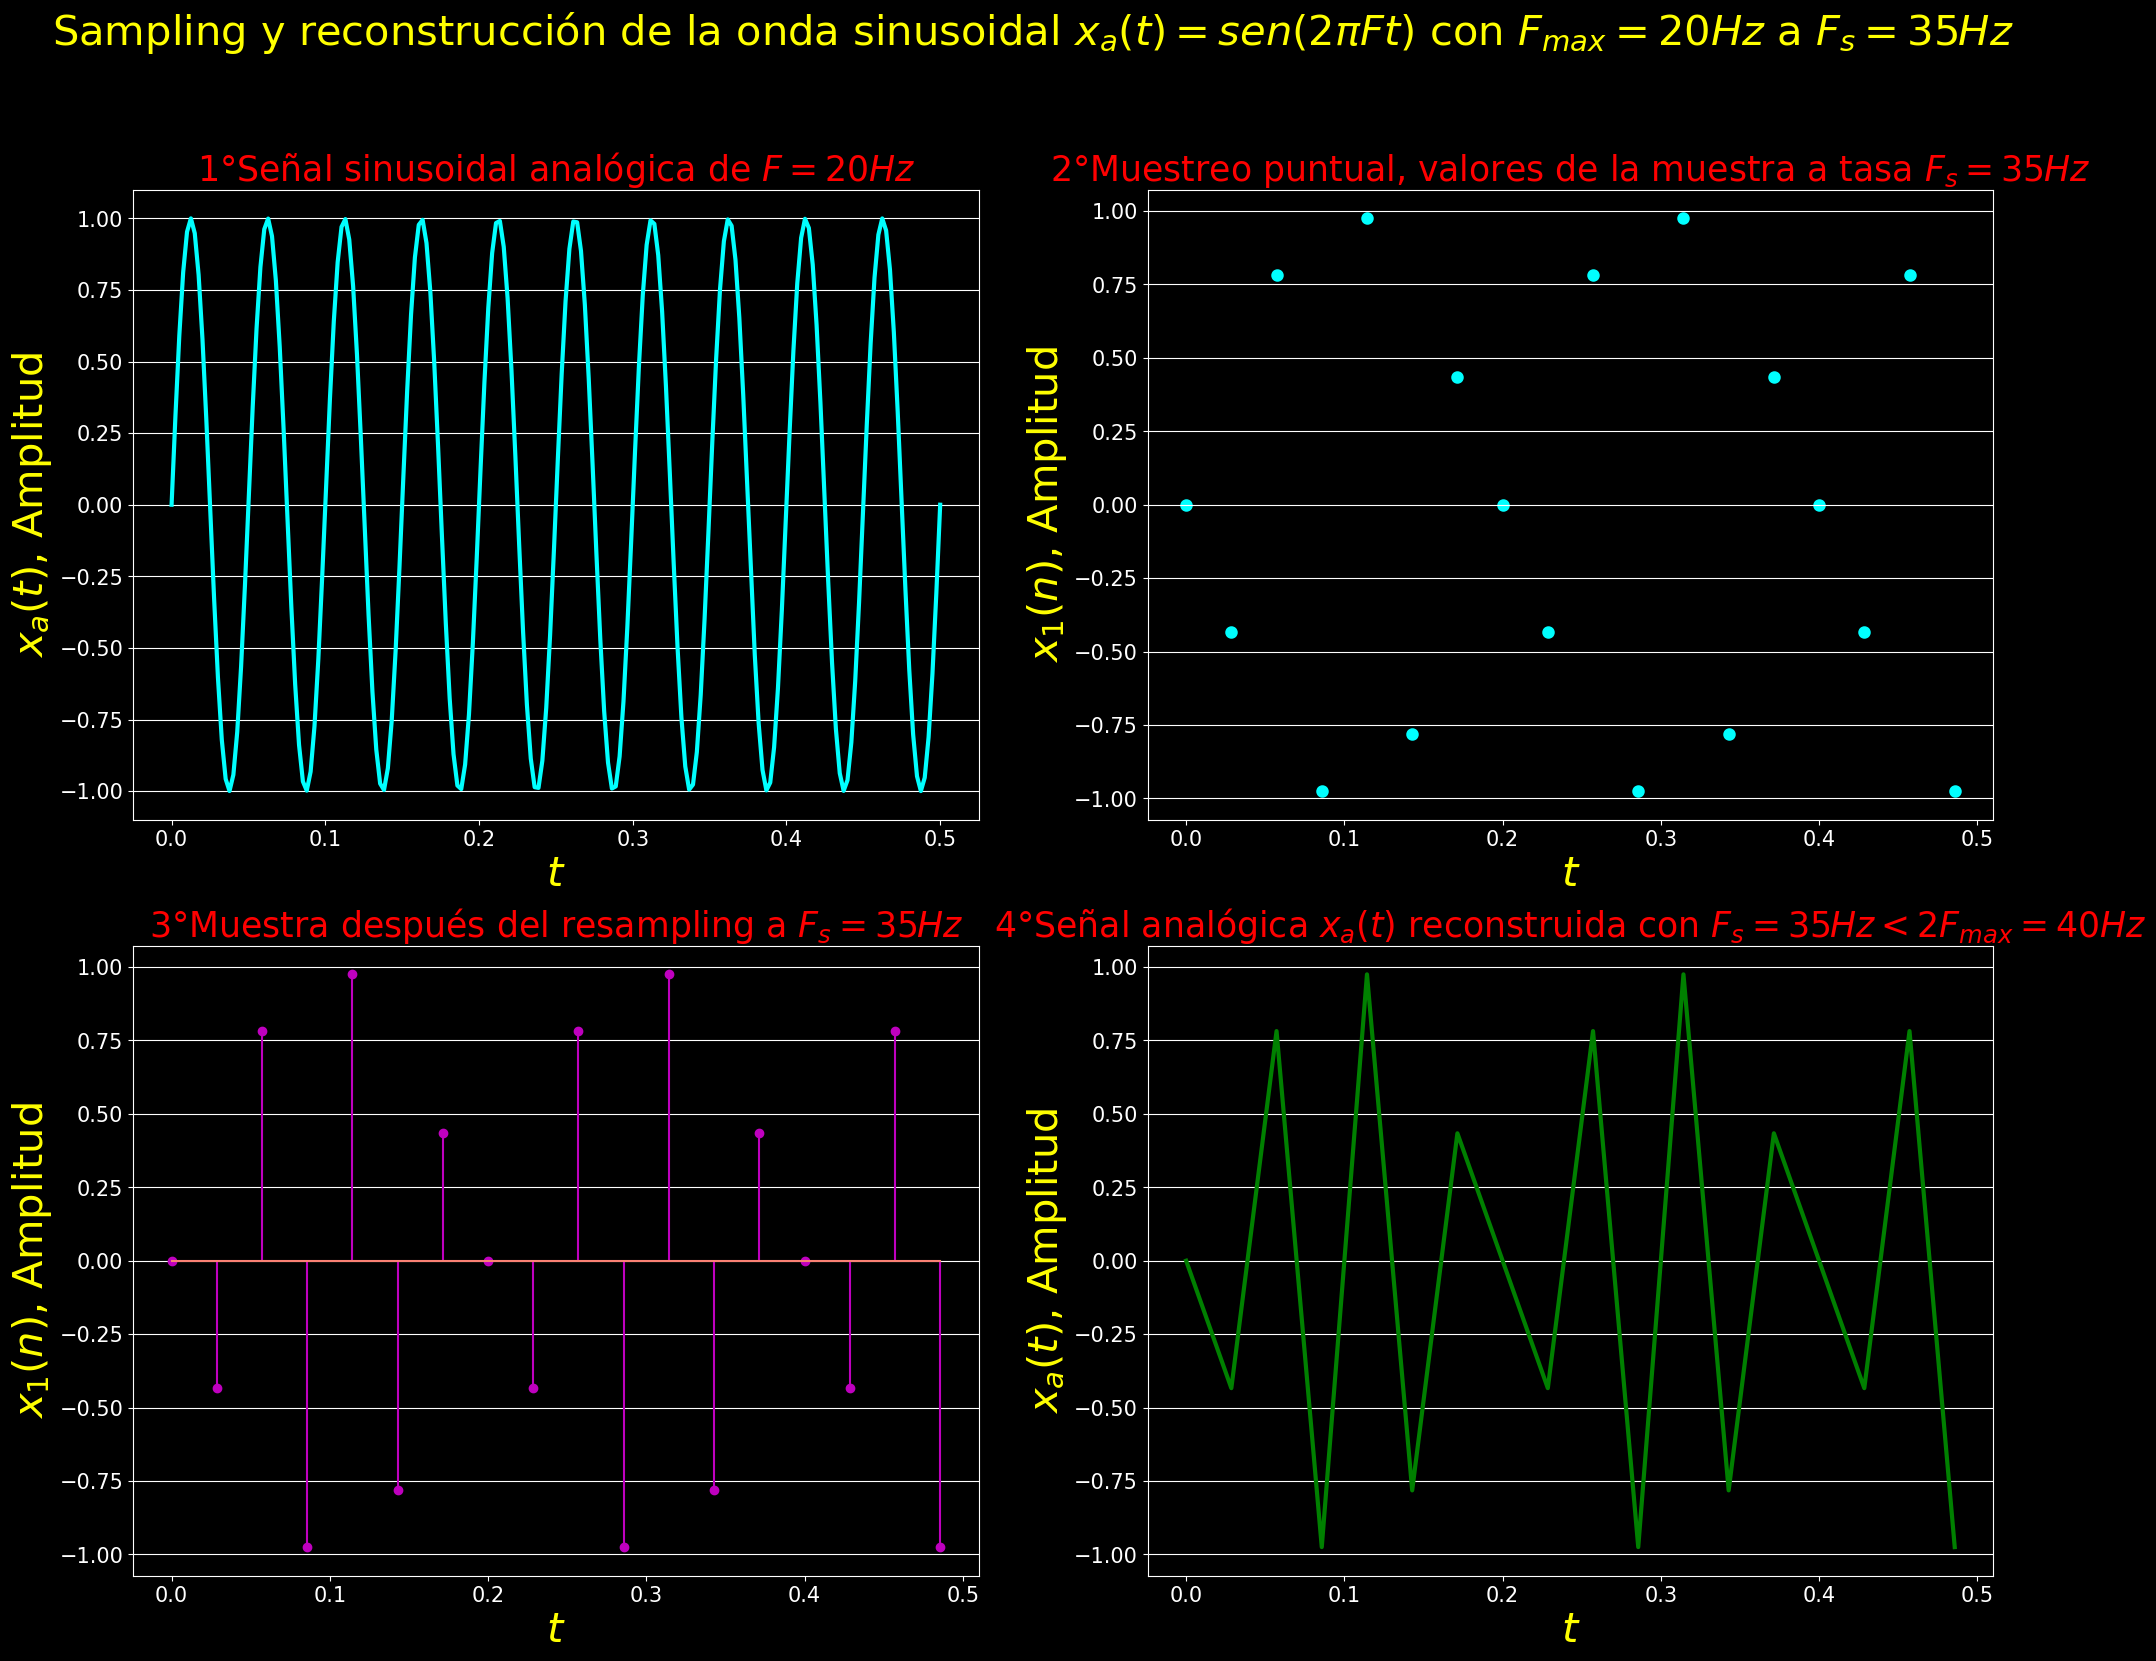

In [10]:
plt.figure(figsize = (24,18)) 
plt.suptitle(r'Sampling y reconstrucción de la onda sinusoidal $x_a (t) = sen(2 \pi F t)$ con $F_{max}= 20Hz$ a $F_s=35Hz$', fontsize = 30,color="yellow")
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

#Gráfico de x_a(t):
plt.subplot(2,2,1) 
plt.plot(t,x_a,linewidth = 3,color="cyan") 
plt.title(r'1°Señal sinusoidal analógica de $F=20 Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_a(t)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#Gráfico de las sampling marks:
plt.subplot(2,2,2)
plt.scatter(tdis1,x1,linewidth = 3,color="cyan")
plt.title(r'2°Muestreo puntual, valores de la muestra a tasa $F_s=35Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_1(n)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#Gráfico del resampling:
plt.subplot(2,2,3)
plt.stem(tdis1,x1,'m')
plt.title('3°Muestra después del resampling a $F_s = 35Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_1(n)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#Reconstrucción de la señal analógica:
plt.subplot(2,2,4)
plt.plot(tdis1,x1,'g-',linewidth = 3)
plt.title(r'4°Señal analógica $x_a(t)$ reconstruida con $F_s=35Hz < 2F_{max}=40Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_a(t)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")



plt.show()


### De entrada, podemos ver la diferencia del número datos registrados en el tiempo continuo de la señal analógica y en la señal muestreada, pues reconstruimos la señal a partir de tener un muestreo con el $9\%$ de datos.

In [7]:
print(len(x1))
print(len(x_a))
print((18/200)*100)

18
200
9.0


### La señal fue reconstruida siendo que $F_s$ no satisface la condición de Nyquist ($F_s \geq F_N$).

### Como consecuencia de no satisfacer la condición anterior, en la gráfica $4°$ de este Caso 1 (la correspondiente a la reconstrucción), aunque graficamos los puntos de muestreo con una curva continua, se puede observar una distorsión, una pérdida de información. Es decir, se presenta *aliasing* como resultado de haber empleado una frecuencia de muestreo insuficiente para capturar adecuadamente la frecuencia de la señal analógica original.

# $\blacksquare$ Caso 2, $F_s=50Hz$:

### El prodecimiento es análogo, pero redefiniendo las variables y una función *sampleada* $x_2(n)=sen(2 \pi F n\tau)$:

In [17]:
Fs2=50 #Hz
tau2 = 1/Fs2
n2=np.arange(Fs2*0, Fs2*0.5)
tdis2= n2*tau2
x2=np.sin(2*np.pi *F*tdis2)  

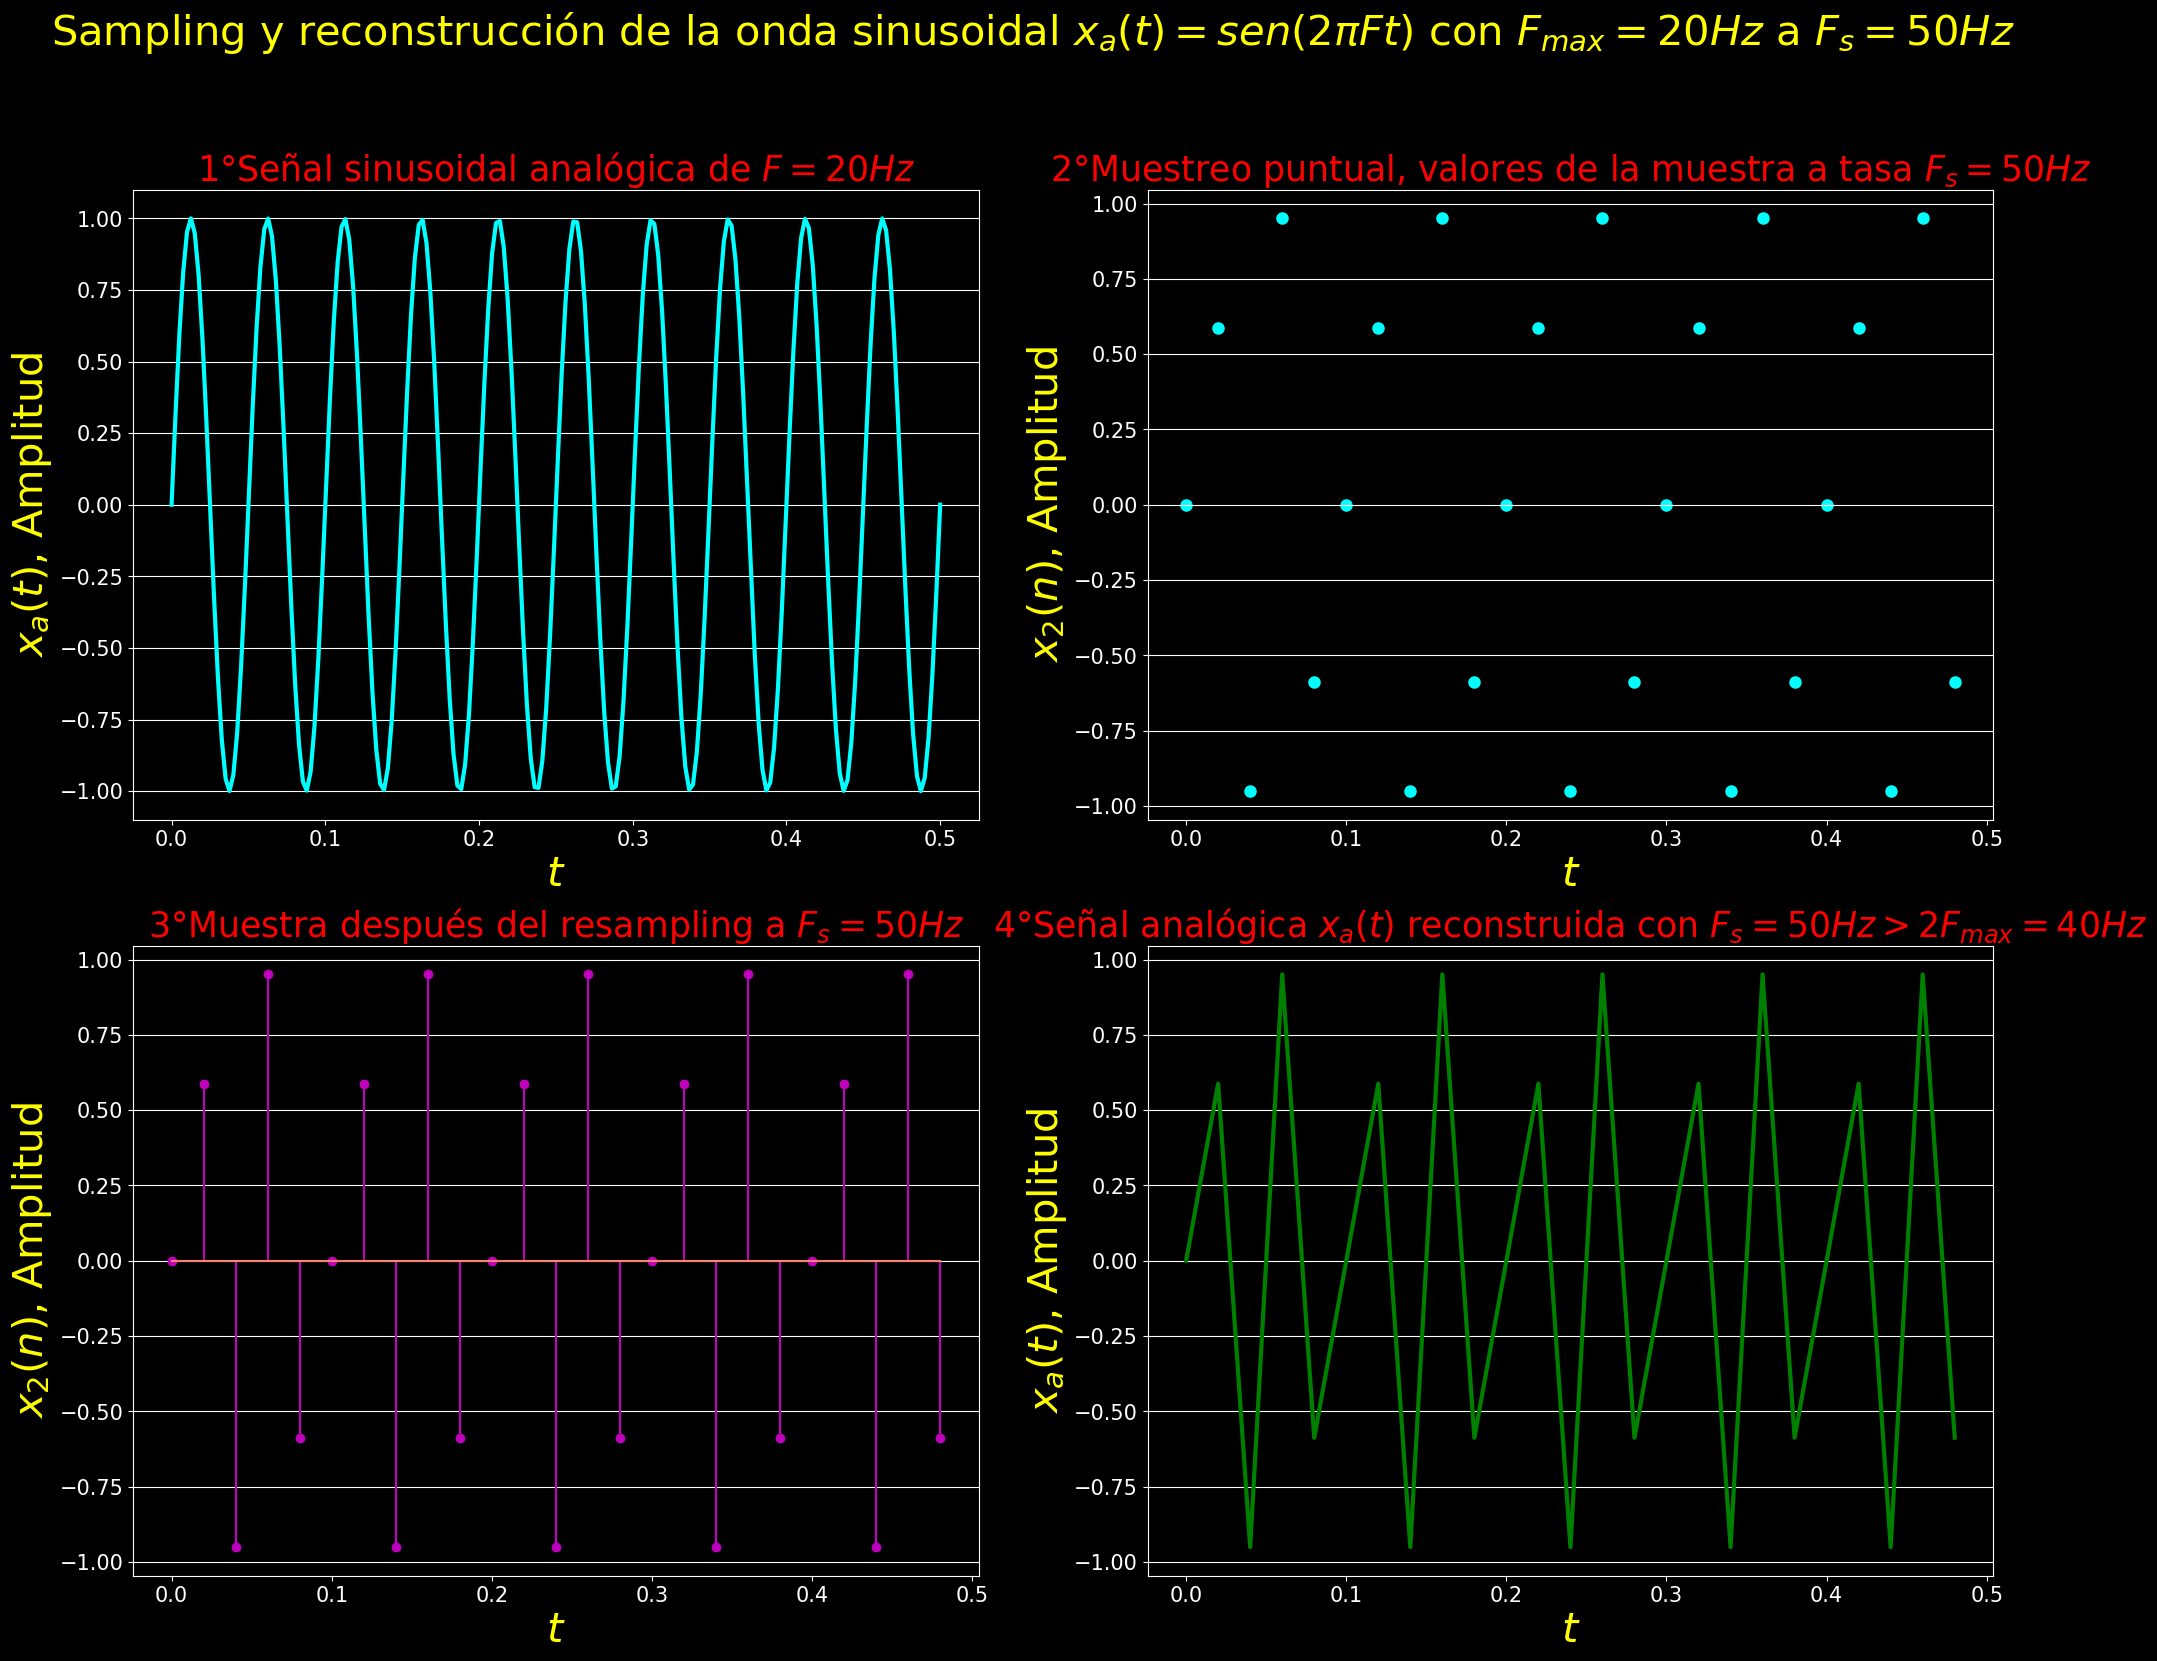

In [19]:
plt.figure(figsize = (24,18)) 
plt.suptitle(r'Sampling y reconstrucción de la onda sinusoidal $x_a (t) = sen(2 \pi F t)$ con $F_{max}= 20Hz$ a $F_s=50Hz$', fontsize = 30,color="yellow")
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

#1
plt.subplot(2,2,1) 
plt.plot(t,x_a,linewidth = 3,color="cyan") 
plt.title(r'1°Señal sinusoidal analógica de $F=20 Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_a(t)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#2
plt.subplot(2,2,2)
plt.scatter(tdis2,x2,linewidth = 3,color="cyan")
plt.title(r'2°Muestreo puntual, valores de la muestra a tasa $F_s=50Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_2(n)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#3:
plt.subplot(2,2,3)
plt.stem(tdis2,x2,'m')
plt.title('3°Muestra después del resampling a $F_s = 50Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_2(n)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#4:
plt.subplot(2,2,4)
plt.plot(tdis2,x2,'g-',linewidth = 3)
plt.title(r'4°Señal analógica $x_a(t)$ reconstruida con $F_s=50Hz > 2F_{max}=40Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_a(t)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")


### En este caso vemos que se cumple que $F_s=50Hz>2F_{max}=40Hz=F_N$, pero podemos ver que en la gráfica $4°$ se sigue presentando *aliasing*, aunque en menor medida que para $F_s=35Hz$,  por lo que parece que esta frecuencia de muestreo tomada sigue siendo insuficiente para la adecuada reconstrucción de la señal.

# $\blacksquare$ Caso 3, $F_s=100Hz$:

###  Redefinimos las variables y una función *sampleada* $x_3(n)=sen(2 \pi F n\tau)$:

In [22]:
Fs3=100 #Hz
tau3 = 1/Fs3
n3=np.arange(Fs3*0, Fs3*0.5)
tdis3= n3*tau3
x3=np.sin(2*np.pi *F*tdis3)  

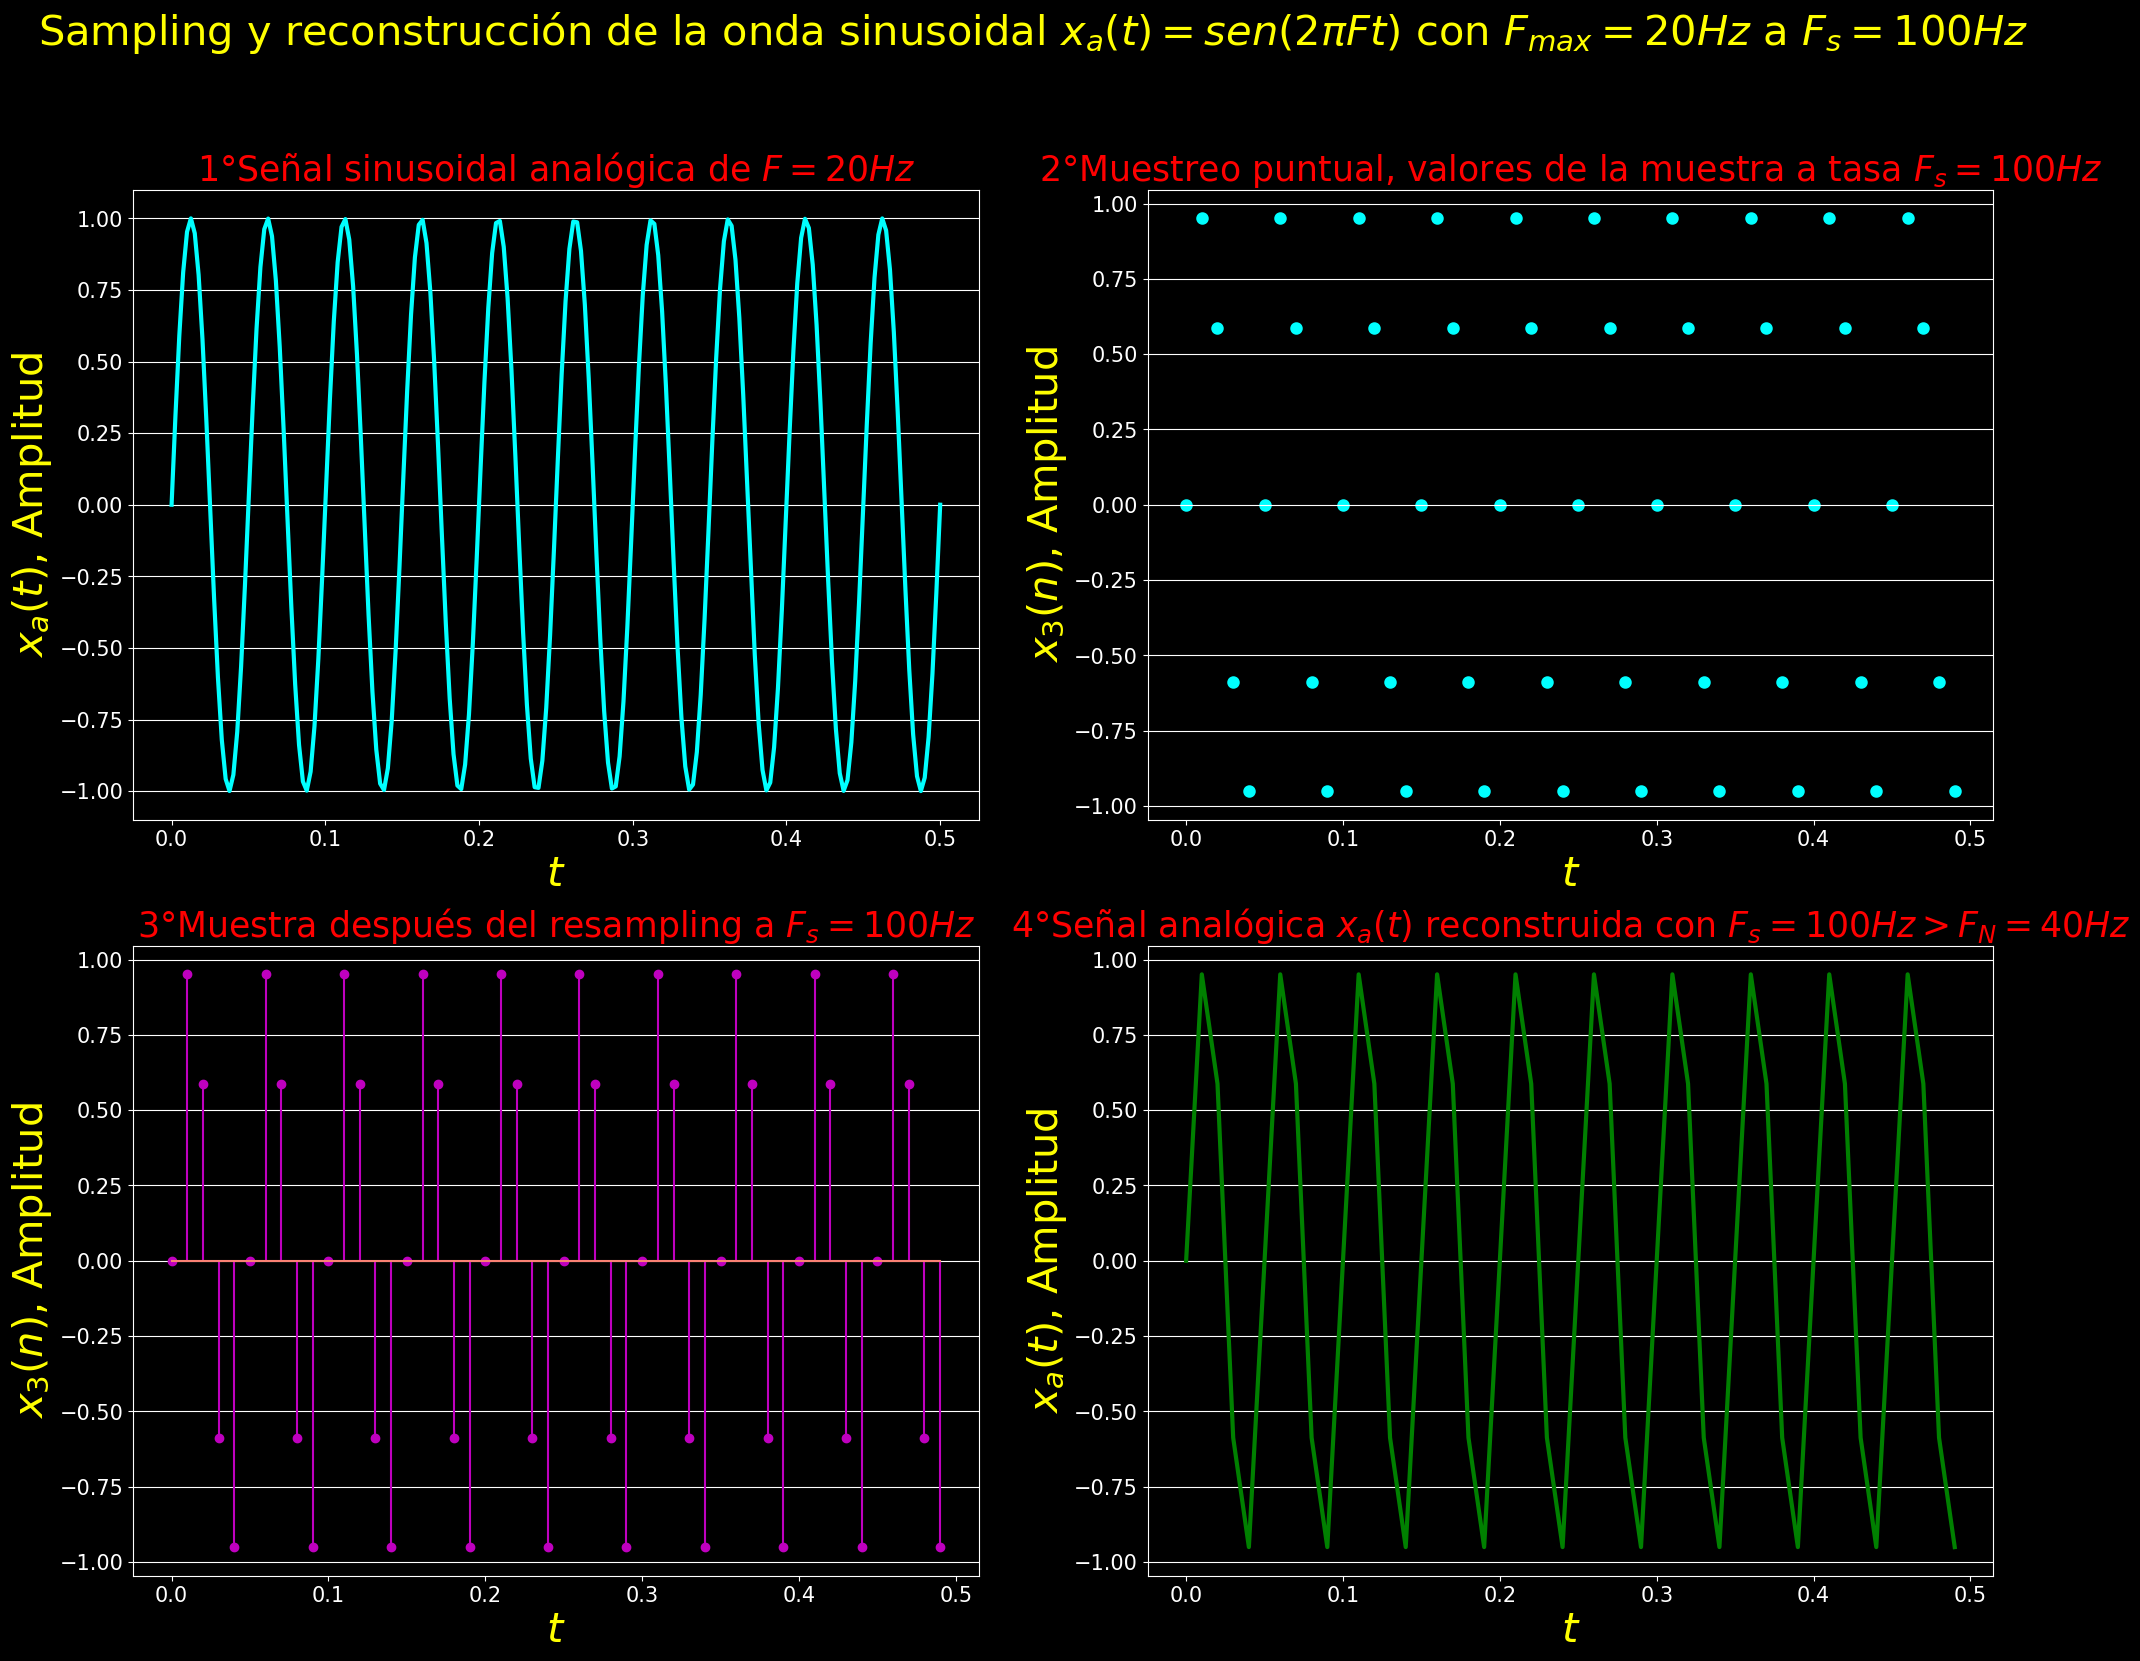

In [25]:
plt.figure(figsize = (24,18)) 
plt.suptitle(r'Sampling y reconstrucción de la onda sinusoidal $x_a (t) = sen(2 \pi F t)$ con $F_{max}= 20Hz$ a $F_s=100Hz$', fontsize = 30,color="yellow")
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

#1
plt.subplot(2,2,1) 
plt.plot(t,x_a,linewidth = 3,color="cyan") 
plt.title(r'1°Señal sinusoidal analógica de $F=20 Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_a(t)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#2
plt.subplot(2,2,2)
plt.scatter(tdis3,x3,linewidth = 3,color="cyan")
plt.title(r'2°Muestreo puntual, valores de la muestra a tasa $F_s=100Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_3(n)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#3:
plt.subplot(2,2,3)
plt.stem(tdis3,x3,'m')
plt.title('3°Muestra después del resampling a $F_s = 100Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_3(n)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#4:
plt.subplot(2,2,4)
plt.plot(tdis3,x3,'g-',linewidth = 3)
plt.title(r'4°Señal analógica $x_a(t)$ reconstruida con $F_s=100Hz > F_N=40Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_a(t)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

### Nuevamente se cumple que $F_s=100Hz>2F_{max}=40Hz=F_N$, y bajo esta frecuencia de muestreo, con $\frac{1}{4}$ de los datos de tiempo continuo, la reconstrucción es parecida a la señal, por lo que para no alargar el primer ejercicio de este notebook, podemos decir que a $F_s=100Hz$, las muestras fueron lo suficientemente frecuentes como para reconstruir "apropiadamente" la señal analógica $x_a (t)$. 

### Aunque esta reconstrucción mejoraría si aumentáramos $F_s > 100Hz$, podemos decir que cuando $F_s=5F_{max}$, la reconstrucción puede considerarse como adecuada.

# El segundo ejercicio consiste en reconstruir, de manera análoga al proceso anterior, una señal sinusoidal expresada como la suma de dos señales sinusoidales, la cual está descrita analíticamente mediante la función:

<font size="5"> $x_a(t) = 2sen(2 \pi 10t) + sen(2 \pi 20 t)$

### En donde vemos que para esta señal, la frecuencia máxima es $F_{max}=20Hz$

### Con su sampleo descrito por:

<font size="5"> $x_4(n)=2sen(2 \pi 10n \tau) + sen(2 \pi 20 n \tau)$

In [27]:
x_a2=2*np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

### Con base en los resultados anteriores, vamos a definir $F_s=100Hz$, frecuencia que cumple con la condición $F_s > F_N$ :

In [28]:
Fs4=100 #Hz. 
tau4= 1/Fs4
n4=np.arange(Fs4*0, Fs4*0.5)
tdis4=n4*tau4
x4=2*np.sin(2*np.pi*10*tdis4) + np.sin(2*np.pi*20*tdis4)

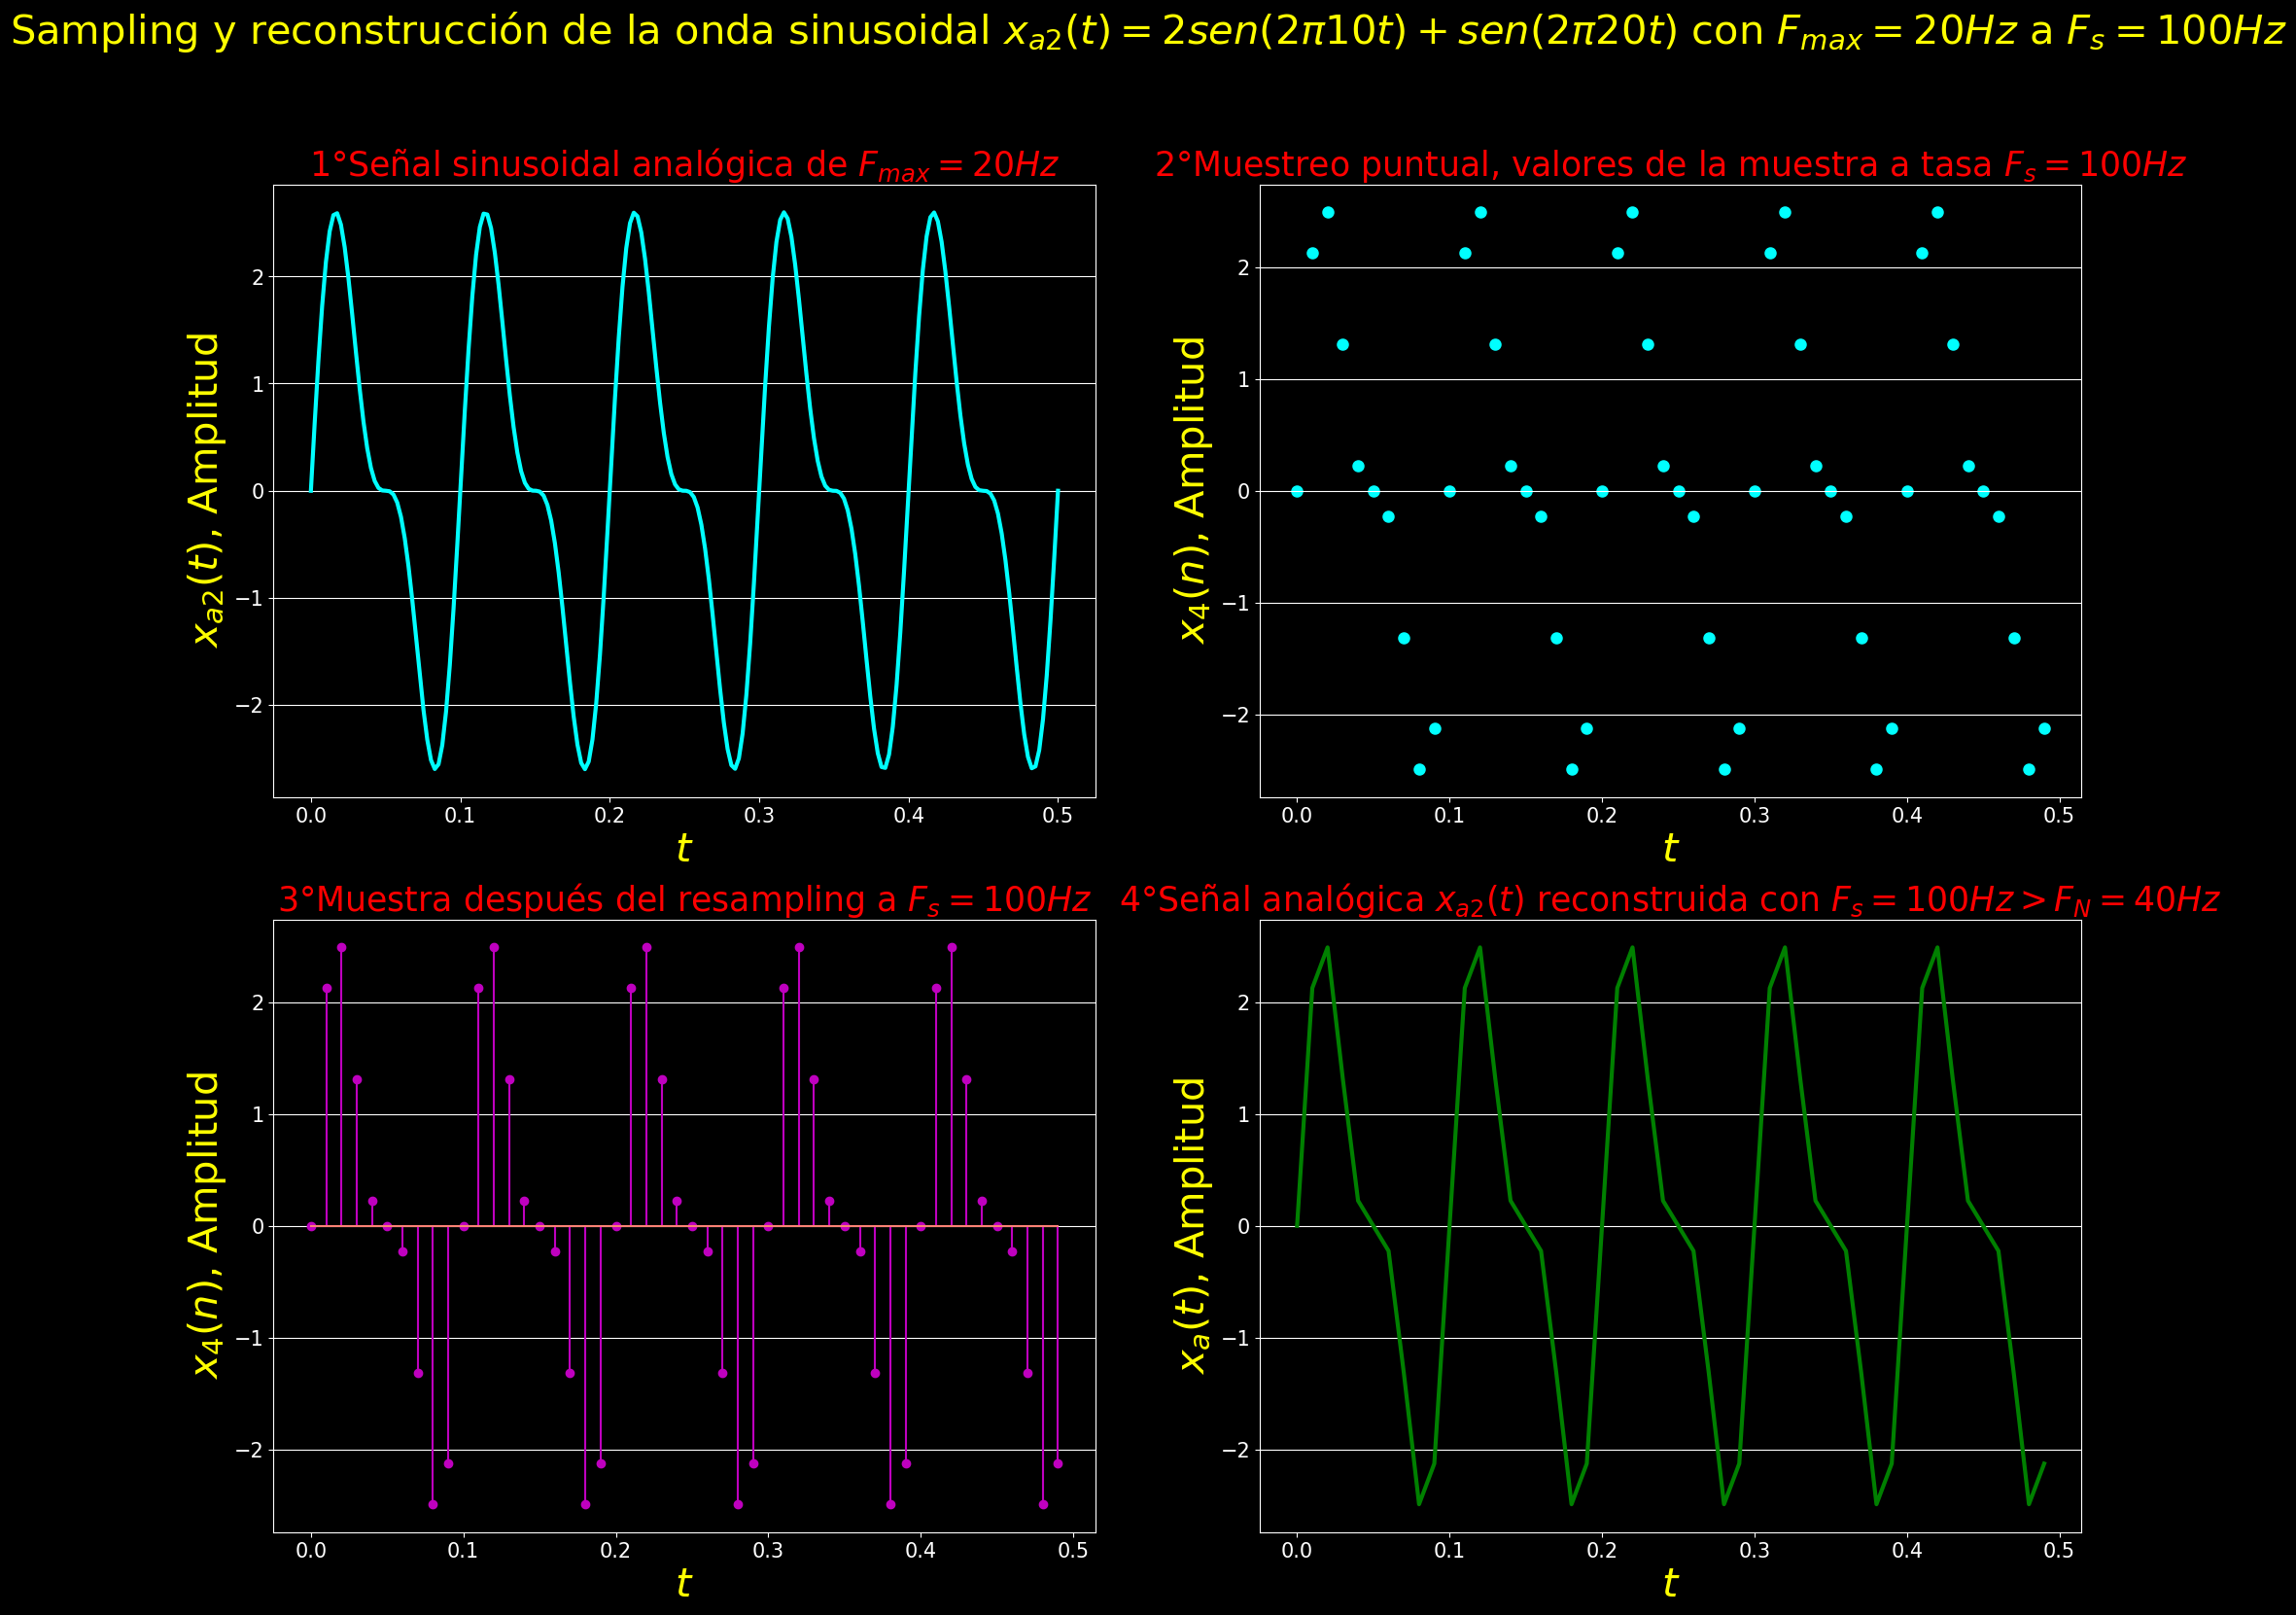

In [31]:
plt.figure(figsize = (24,18)) 
plt.suptitle(r'Sampling y reconstrucción de la onda sinusoidal $x_{a2} (t) =2sen(2 \pi 10t) + sen(2 \pi 20 t)$ con $F_{max}= 20Hz$ a $F_s=100Hz$', fontsize = 30,color="yellow")
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

#1
plt.subplot(2,2,1) 
plt.plot(t,x_a2,linewidth = 3,color="cyan") 
plt.title(r'1°Señal sinusoidal analógica de $F_{max}=20 Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_{a2}(t)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#2
plt.subplot(2,2,2)
plt.scatter(tdis4,x4,linewidth = 3,color="cyan")
plt.title(r'2°Muestreo puntual, valores de la muestra a tasa $F_s=100Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_4(n)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#3:
plt.subplot(2,2,3)
plt.stem(tdis4,x4,'m')
plt.title('3°Muestra después del resampling a $F_s = 100Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_4(n)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

#4:
plt.subplot(2,2,4)
plt.plot(tdis4,x4,'g-',linewidth = 3)
plt.title(r'4°Señal analógica $x_{a2}(t)$ reconstruida con $F_s=100Hz > F_N=40Hz$', fontsize = 25,color="r")
plt.xlabel('$t$', fontsize = 30,color="yellow")
plt.ylabel(r'$x_a(t)$, Amplitud', fontsize = 30,color="yellow")
plt.grid(True,axis="y")

# Fuentes recomendadas:

###  $\blacksquare$ (2007) Proakis, J. G. ,  Manolakis, D. K. *Digital Signal Processing: Principles, Algorithms and Applications. Fourth Edition*. Prentice Hall.

### $\blacksquare$ Wikipedia contributors. (n.d.). Aliasing. Wikipedia. Retrieved September 24, 2024, from https://en.wikipedia.org/wiki/Aliasing